In [1]:
import matplotlib.pyplot as plt
import sys
import os
import numpy as np
%load_ext autoreload
%autoreload 2

In [2]:
pythia_dir = os.path.join(
    os.path.expanduser('~'), 'devel', 'apps', 'pythia8240')
sys.path.append(os.path.join(pythia_dir, 'lib'))

from impy.definitions import *
from impy.constants import *
from impy.kinematics import EventKinematics
from impy.common import impy_config, pdata

In [3]:
# Some models require that the initialization provides a maximal energy
# and if it requires initilizations of nuclear tables or not.
# In this case insert here the maximal energy/mass that you want to use
# during a run. (Not relevant for Pythia8).
event_kinematics = EventKinematics(
    ecm= 158 * GeV,
    p1pdg=2212,
#     p2pdg=2212
    nuc2_prop=(12,6)
)

In [4]:
# The frame in which impy provides the stack to the user
impy_config["user_frame"] = 'center-of-mass'

In [5]:
pythia = make_generator_instance(interaction_model_by_tag['PYTHIA8'])
pythia.init_generator(event_kinematics)

sibyll = make_generator_instance(interaction_model_by_tag['SIBYLL23C'])
sibyll.init_generator(event_kinematics)


In [6]:
n_bins = 30
bins = np.linspace(-1,1.,n_bins+1)
grid = 0.5*(bins[1:] + bins[:-1])
widths = (bins[1:] - bins[:-1])
py_pions = np.zeros(n_bins)
py_protons = np.zeros(n_bins)
eta_bins = np.linspace(-7,7,n_bins+1)
eta_grid = 0.5*(eta_bins[1:] + eta_bins[:-1])
wdths_eta = (eta_bins[1:] - eta_bins[:-1])
py_charged_eta = np.zeros(n_bins)

n_events = 1000
norm = 1./float(n_events)

# This
for event in pythia.event_generator(event_kinematics, n_events):
    event.filter_final_state_charged()
    py_protons += norm*np.histogram(event.xf[event.id == 2212],bins=bins)[0]
    py_pions += norm*np.histogram(event.xf[np.abs(event.id) == 211],bins=bins)[0]
    py_charged_eta += norm*np.histogram(event.eta,bins=eta_bins)[0]

impy/common.py:214: RuntimeWarning: divide by zero encountered in log
  return np.log((self.p_tot + self.pz) / self.pt)
impy/common.py:214: RuntimeWarning: invalid value encountered in divide
  return np.log((self.p_tot + self.pz) / self.pt)


In [7]:
sib_pions = np.zeros(n_bins)
sib_protons = np.zeros(n_bins)
sib_charged_eta = np.zeros(n_bins)
# This
for event in sibyll.event_generator(event_kinematics, n_events):
    event.filter_final_state_charged()
    sib_protons += norm*np.histogram(event.xf[event.id == 2212],bins=bins)[0]
    sib_pions += norm*np.histogram(event.xf[np.abs(event.id) == 211],bins=bins)[0]
    sib_charged_eta += norm*np.histogram(event.eta,bins=eta_bins)[0]

[]

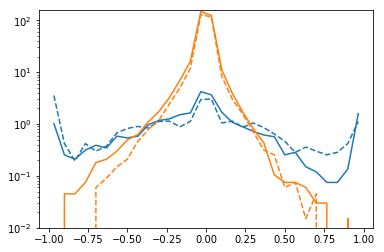

In [10]:
l=plt.plot(grid, py_protons/widths)[0]
plt.plot(grid, sib_protons/widths,c=l.get_color(), ls='--',label='SIBYLL2.3c')
l=plt.plot(grid, py_pions/widths)[0]
plt.plot(grid, sib_pions/widths,c=l.get_color(), ls='--',label='SIBYLL2.3c')
plt.ylim(1e-2,)
plt.semilogy()

(0, 7)

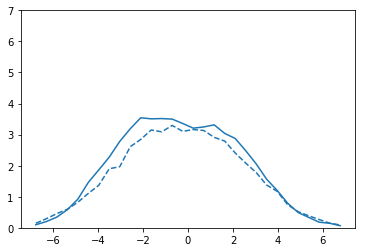

In [11]:
l=plt.plot(eta_grid, py_charged_eta/wdths_eta)[0]
plt.plot(eta_grid, sib_charged_eta/wdths_eta,c=l.get_color(), ls='--',label='SIBYLL2.3c')
plt.ylim(0,7)
# plt.semilogy()